# Week 5 Assignment
Go through https://www.kaggle.com/ash316/ml-from-scratch-with-iris and replicate the notebook. Also try it on another dataset.


## Iris Dataset EDA & ML

In [ ]:
# Data EDA
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Set Seaborn plotting style
sns.set_style('darkgrid')

%matplotlib inline

### Data Loading
scikit-learn has some datasets built in to try out; the iris dataset is one of them.

In [ ]:
iris_databunch = datasets.load_iris()

# Get features
features = iris_databunch.data

# Get target labels (as numbers)
labels = iris_databunch.target

# Get column names for DataFrame construction
columns = iris_databunch.feature_names + ['species']

# Get mapping of label number to string name
target_mapping = {idx:target for idx, target in enumerate(iris_databunch.target_names)}

# Create DataFrame
iris = pd.DataFrame(np.concatenate((features, labels.reshape(-1, 1)), axis = 1), columns = columns)

# Replace "species" column values with actual names
iris['species'] = iris['species'].apply(lambda x: target_mapping.get(x))

# Show couple rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

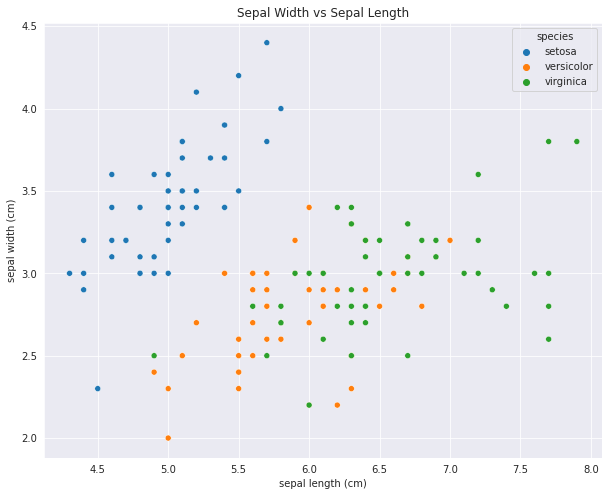

In [ ]:
# Let's graph all the species based on sepal length and width
fig = plt.figure(figsize = (10, 8))
sns.scatterplot(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], hue = iris['species']);
fig.gca().set_title('Sepal Width vs Sepal Length');

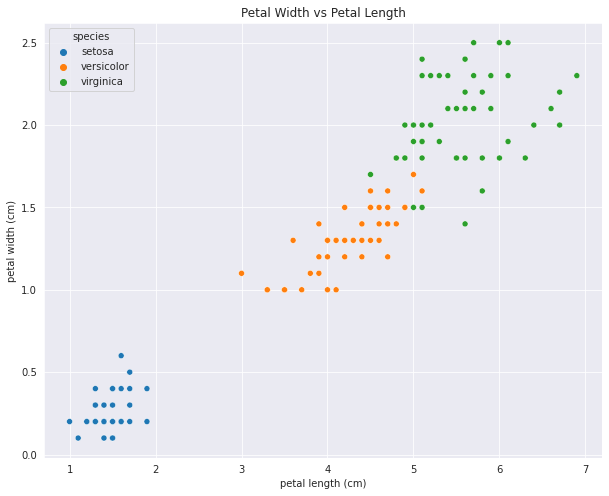

In [ ]:
# Let's graph all the species based on petal length and width
fig = plt.figure(figsize = (10, 8))
sns.scatterplot(x = iris['petal length (cm)'], y = iris['petal width (cm)'], hue = iris['species']);
fig.gca().set_title('Petal Width vs Petal Length');

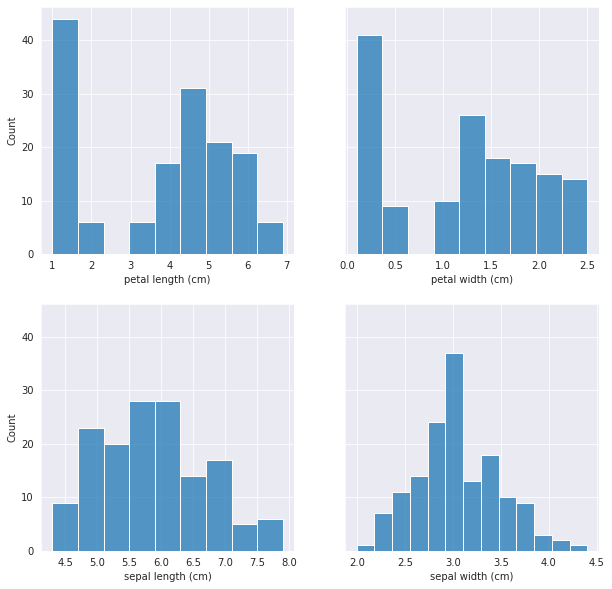

In [ ]:
# Let's look at how lengths and widths are distributed
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey = True)
sns.histplot(data = iris, x = 'petal length (cm)', ax = axs[0, 0]);
sns.histplot(data = iris, x = 'petal width (cm)', ax = axs[0, 1]);
sns.histplot(data = iris, x = 'sepal length (cm)', ax = axs[1, 0]);
sns.histplot(data = iris, x = 'sepal width (cm)', ax = axs[1, 1]);

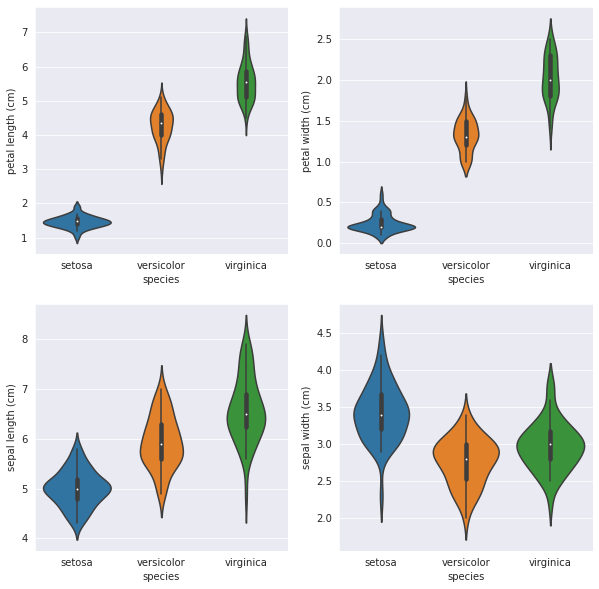

In [ ]:
# How does each of the above values vary by species?
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
sns.violinplot(data = iris, x = 'species', y = 'petal length (cm)', ax = axs[0, 0]);
sns.violinplot(data = iris, x = 'species', y = 'petal width (cm)', ax = axs[0, 1]);
sns.violinplot(data = iris, x = 'species', y = 'sepal length (cm)', ax = axs[1, 0]);
sns.violinplot(data = iris, x = 'species', y = 'sepal width (cm)', ax = axs[1, 1]);

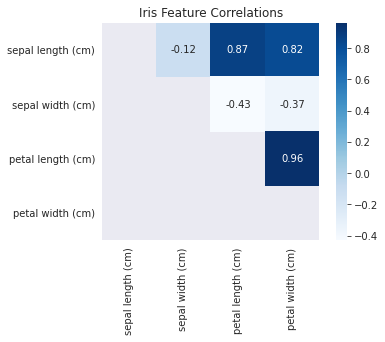

In [ ]:
# How are the features correlated with each other?
corr = iris.corr() # Generate correlation matrix

# Generate a mask for the lower triangle
mask = np.tril(np.ones_like(corr, dtype = bool))

# Plot correlation matrix
fig = plt.figure()
sns.heatmap(corr, annot = True, mask = mask, square = True, cmap = 'Blues');
fig.gca().set_title('Iris Feature Correlations');

### Train-Test Split

In [ ]:
# Do a 70-30 split for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.drop(columns = 'species'),
    iris['species'],
    test_size = 0.3,
    random_state = 1
)
print(f'Training Shape (Features): {X_train.shape}')
print(f'Testing Shape (Features):  {X_test.shape}')
print(f'Training Shape (Labels): {y_train.shape}')
print(f'Testing Shape (Labels):  {y_test.shape}')
print('TRAINING SAMPLE'.center(50, '='))
display(X_train.head(2))
print('TESTING SAMPLE'.center(50, '='))
display(X_test.head(2))

Training Shape (Features): (105, 4)
Testing Shape (Features):  (45, 4)
Training Shape (Labels): (105,)
Testing Shape (Labels):  (45,)
=================TRAINING SAMPLE==================


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3


==================TESTING SAMPLE==================


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


### Model Training (All Features)

In [ ]:
# Training an SVC model
svc = svm.SVC()
svc.fit(X_train, y_train)

# Get predictions
svc_preds = svc.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# Training logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get predictions
lr_preds = lr.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# Training decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Get predictions
dt_preds = dt.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
# Training k-NN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Get predictions
knn_preds = knn.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



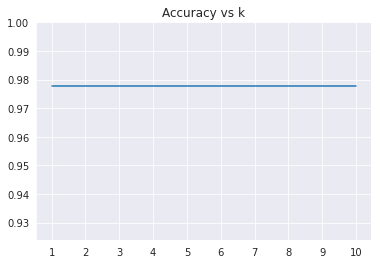

In [ ]:
# Train multiple k-NN models, changing k
k_values = [i for i in range(1, 11)]
acc_list = []
for k in k_values:
    # Train model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Get predictions
    knn_preds = knn.predict(X_test)

    # Get accuracy
    acc_list.append(metrics.accuracy_score(y_test, knn_preds))

# Plot accuracy values vs k
plt.plot(k_values, acc_list);
plt.title('Accuracy vs k');
plt.ylim(top = 1);
plt.xticks(k_values);

### Model Training (Petal-Only vs Sepal-Only Features)

In [ ]:
# Training an SVC model
svc = svm.SVC()

for feature in ['petal', 'sepal']:
    feature_cols = [f'{feature} width (cm)', f'{feature} length (cm)']

    # Train model on selected columns
    svc.fit(X_train[feature_cols], y_train)

    # Get predictions
    svc_preds = svc.predict(X_test[feature_cols])

    # Get metrics
    print(f'{feature.upper()} RESULTS'.center(50, '='))
    print(metrics.classification_report(y_test, svc_preds))

==================PETAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

==================SEPAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.79      0.61      0.69        18
   virginica       0.59      0.77      0.67        13

    accuracy                           0.78        45
   macro avg       0.79      0.79      0.78        45
weighted avg       0.80      0.78      0.78        45



In [ ]:
# Training a logistic regression model
lr = LogisticRegression()

for feature in ['petal', 'sepal']:
    feature_cols = [f'{feature} width (cm)', f'{feature} length (cm)']

    # Train model on selected columns
    lr.fit(X_train[feature_cols], y_train)

    # Get predictions
    lr_preds = lr.predict(X_test[feature_cols])

    # Get metrics
    print(f'{feature.upper()} RESULTS'.center(50, '='))
    print(metrics.classification_report(y_test, lr_preds))

==================PETAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.94      0.97        18
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

==================SEPAL RESULTS===================
              precision    recall  f1-score   support

      setosa       0.93      1.00      0.97        14
  versicolor       0.77      0.56      0.65        18
   virginica       0.59      0.77      0.67        13

    accuracy                           0.76        45
   macro avg       0.76      0.77      0.76        45
weighted avg       0.77      0.76      0.75        45



In [ ]:
# Training a decision tree model
dt = DecisionTreeClassifier()

for feature in ['petal', 'sepal']:
    feature_cols = [f'{feature} width (cm)', f'{feature} length (cm)']

    # Train model on selected columns
    dt.fit(X_train[feature_cols], y_train)

    # Get predictions
    dt_preds = dt.predict(X_test[feature_cols])

    # Get metrics
    print(f'{feature.upper()} RESULTS'.center(50, '='))
    print(metrics.classification_report(y_test, dt_preds))

==================PETAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

==================SEPAL RESULTS===================
              precision    recall  f1-score   support

      setosa       0.93      1.00      0.97        14
  versicolor       0.53      0.44      0.48        18
   virginica       0.40      0.46      0.43        13

    accuracy                           0.62        45
   macro avg       0.62      0.64      0.63        45
weighted avg       0.62      0.62      0.62        45



In [ ]:
# Training a k-NN model
knn = KNeighborsClassifier(n_neighbors = 3)

for feature in ['petal', 'sepal']:
    feature_cols = [f'{feature} width (cm)', f'{feature} length (cm)']

    # Train model on selected columns
    knn.fit(X_train[feature_cols], y_train)

    # Get predictions
    knn_preds = knn.predict(X_test[feature_cols])

    # Get metrics
    print(f'{feature.upper()} RESULTS'.center(50, '='))
    print(metrics.classification_report(y_test, knn_preds))

==================PETAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

==================SEPAL RESULTS===================
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.58      0.61      0.59        18
   virginica       0.42      0.38      0.40        13

    accuracy                           0.67        45
   macro avg       0.67      0.67      0.66        45
weighted avg       0.66      0.67      0.66        45



## Wine Dataset EDA & ML

### Data Loading
For this set, we're using the wine dataset for analysis.

In [ ]:
wine_databunch = datasets.load_wine()

# Get features
features = wine_databunch.data

# Get target labels (as numbers)
labels = wine_databunch.target

# Get column names for DataFrame construction
columns = wine_databunch.feature_names + ['class']

# Get mapping of label number to string name
target_mapping = {idx:target for idx, target in enumerate(wine_databunch.target_names)}

# Create DataFrame
wine = pd.DataFrame(np.concatenate((features, labels.reshape(-1, 1)), axis = 1), columns = columns)

# Replace "species" column values with actual names
wine['class'] = wine['class'].apply(lambda x: target_mapping.get(x))

# Show couple rows
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


### Exploratory Data Analysis

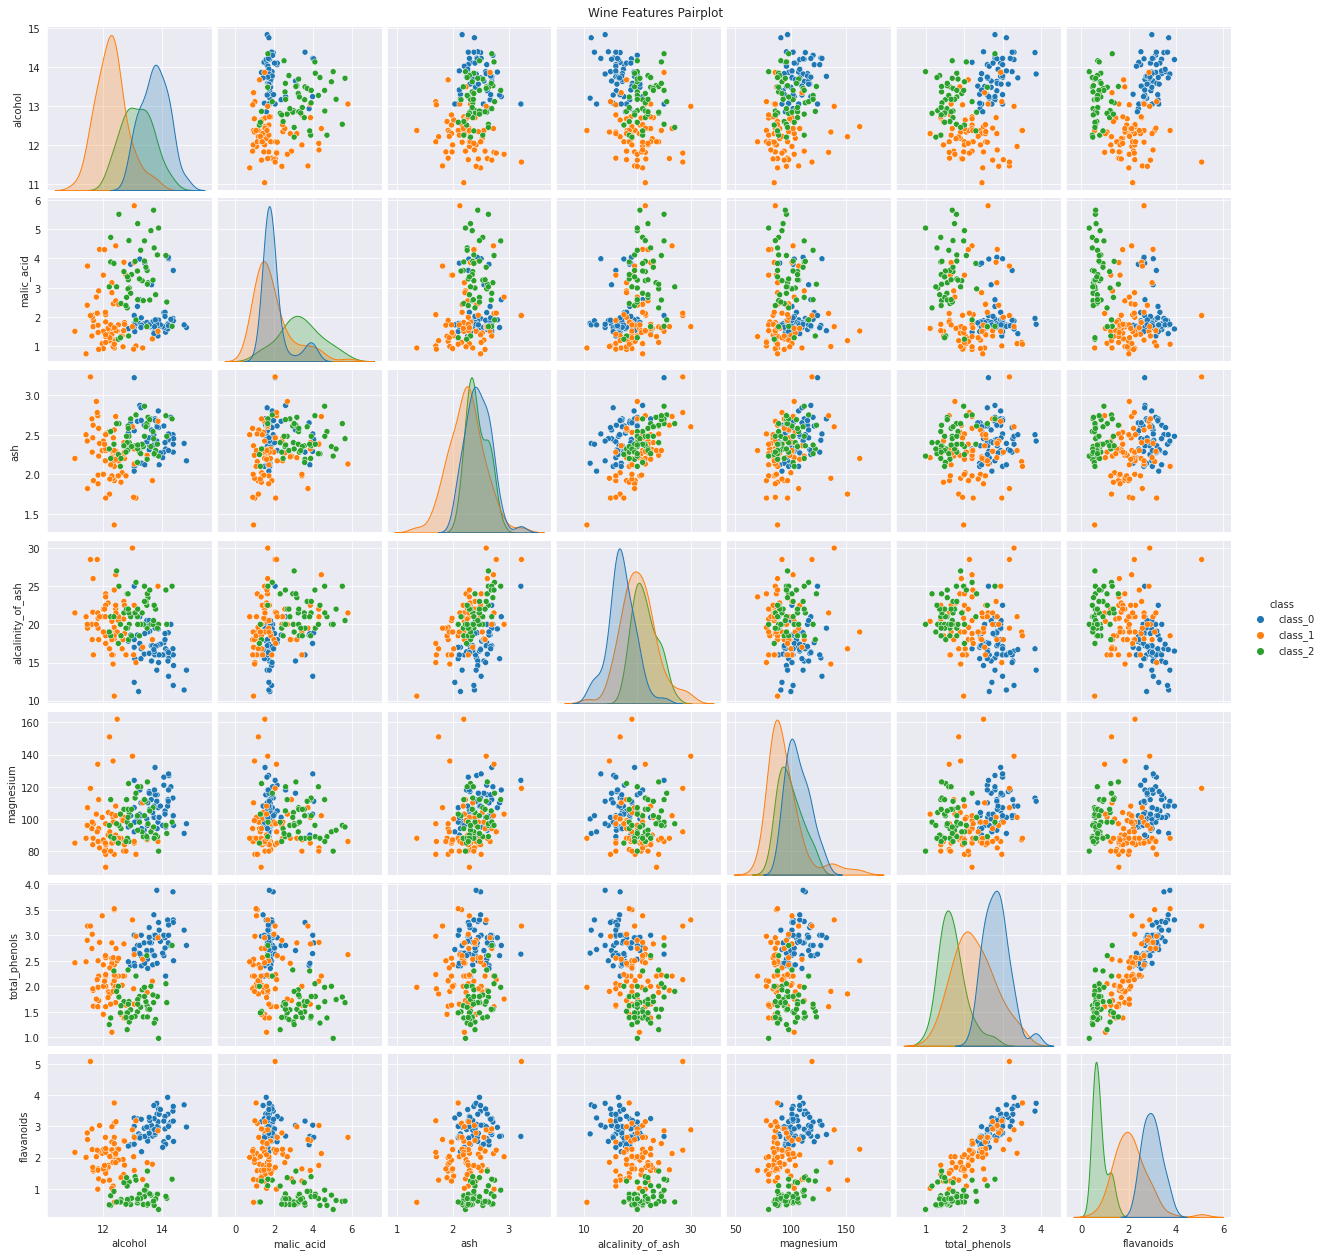

In [ ]:
# Let's graph the first seven features' relationships with class as color
pp = sns.pairplot(data = wine[wine.columns[:7].tolist() + ['class']], hue = 'class');
pp.fig.suptitle('Wine Features Pairplot', y = 1);

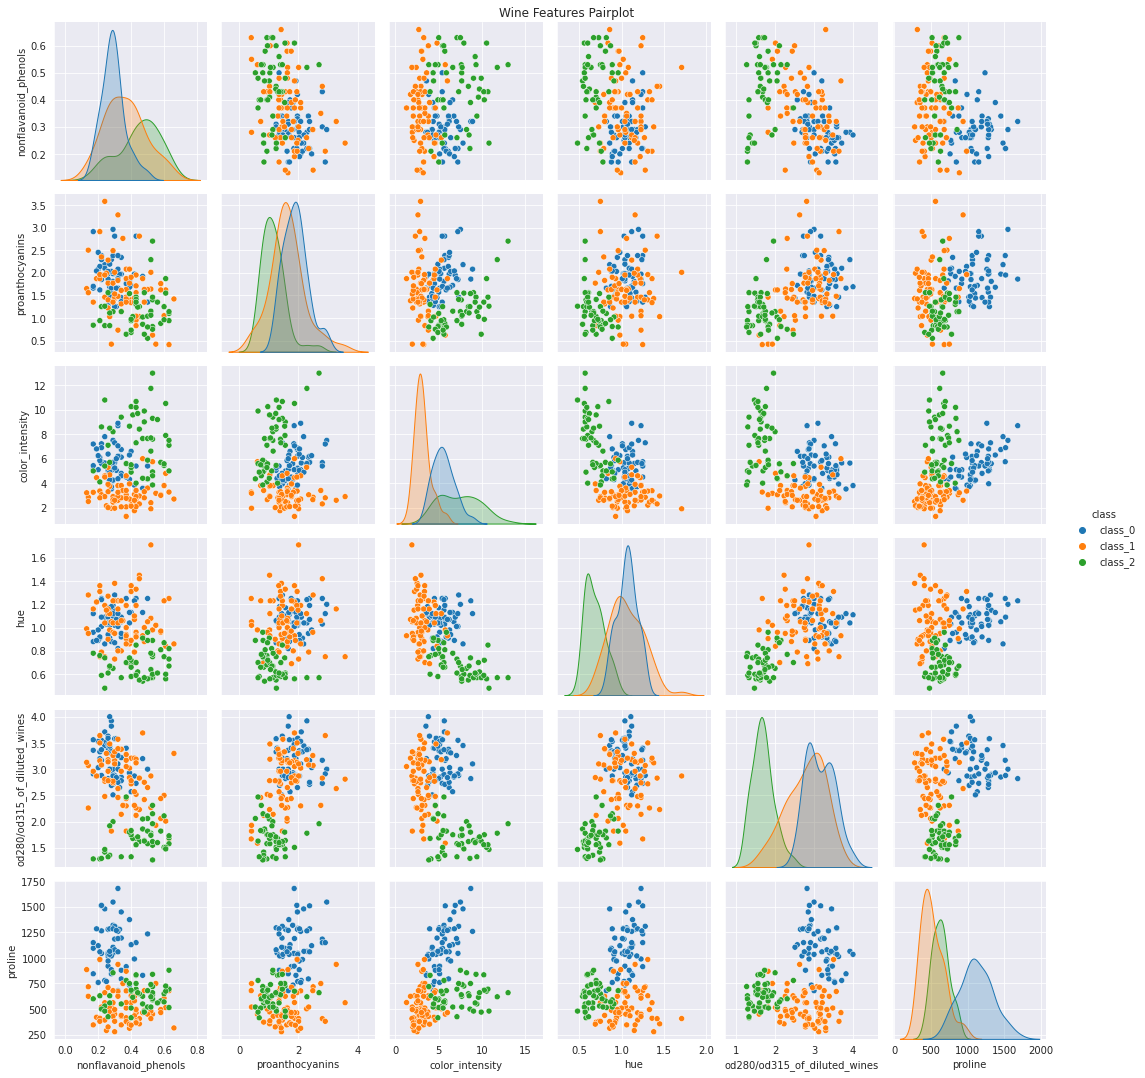

In [ ]:
# Let's graph the last six features' relationships with class as color
pp = sns.pairplot(data = wine[wine.columns[7:]], hue = 'class');
pp.fig.suptitle('Wine Features Pairplot', y = 1);

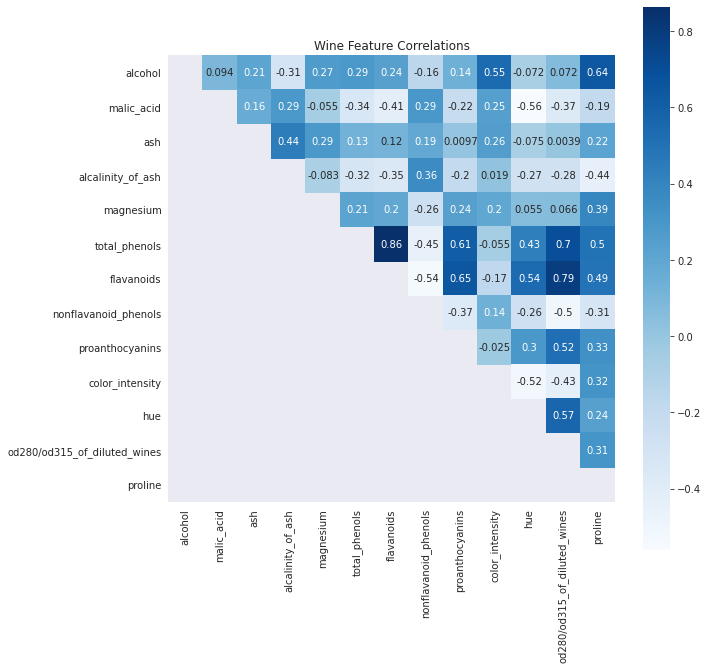

In [ ]:
# How are the features correlated with each other?
corr = wine.corr() # Generate correlation matrix

# Generate a mask for the lower triangle
mask = np.tril(np.ones_like(corr, dtype = bool))

# Plot correlation matrix
fig = plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True, mask = mask, square = True, cmap = 'Blues');
fig.gca().set_title('Wine Feature Correlations');

### Train-Test Split

In [ ]:
# Do a 80-20 split for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    wine.drop(columns = 'class'),
    wine['class'],
    test_size = 0.2,
    random_state = 1
)
print(f'Training Shape (Features): {X_train.shape}')
print(f'Testing Shape (Features):  {X_test.shape}')
print(f'Training Shape (Labels): {y_train.shape}')
print(f'Testing Shape (Labels):  {y_test.shape}')
print('TRAINING SAMPLE'.center(50, '='))
display(X_train.head(2))
print('TESTING SAMPLE'.center(50, '='))
display(X_test.head(2))

Training Shape (Features): (142, 13)
Testing Shape (Features):  (36, 13)
Training Shape (Labels): (142,)
Testing Shape (Labels):  (36,)
=================TRAINING SAMPLE==================


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.6,1.05,2.65,450.0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.9,1.16,3.14,714.0


==================TESTING SAMPLE==================


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
117,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0


### Model Training (All Features)

In [ ]:
# Training an SVC model
svc = svm.SVC()
svc.fit(X_train, y_train)

# Get predictions
svc_preds = svc.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

     class_0       0.92      0.79      0.85        14
     class_1       0.58      0.85      0.69        13
     class_2       0.20      0.11      0.14         9

    accuracy                           0.64        36
   macro avg       0.57      0.58      0.56        36
weighted avg       0.62      0.64      0.61        36



In [ ]:
# Training logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get predictions
lr_preds = lr.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.87      1.00      0.93        13
     class_2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Training decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Get predictions
dt_preds = dt.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       0.86      0.92      0.89        13
     class_2       1.00      0.78      0.88         9

    accuracy                           0.92        36
   macro avg       0.93      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36



In [ ]:
# Training k-NN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Get predictions
knn_preds = knn.predict(X_test)

# Get metrics
print(metrics.classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

     class_0       0.80      0.86      0.83        14
     class_1       0.62      0.62      0.62        13
     class_2       0.38      0.33      0.35         9

    accuracy                           0.64        36
   macro avg       0.60      0.60      0.60        36
weighted avg       0.63      0.64      0.63        36



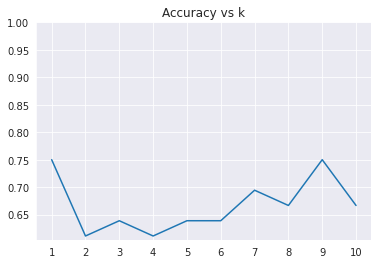

In [ ]:
# Train multiple k-NN models, changing k
k_values = [i for i in range(1, 11)]
acc_list = []
for k in k_values:
    # Train model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Get predictions
    knn_preds = knn.predict(X_test)

    # Get accuracy
    acc_list.append(metrics.accuracy_score(y_test, knn_preds))

# Plot accuracy values vs k
plt.plot(k_values, acc_list);
plt.title('Accuracy vs k');
plt.ylim(top = 1);
plt.xticks(k_values);